In [2]:
# Import necessary libraries
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.compose import *
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import *
from sklearn.model_selection import *
from sklearn.discriminant_analysis import *
from sklearn.preprocessing import *
from sklearn.neighbors import *
from sklearn.naive_bayes import *
from sklearn.pipeline import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import *
import os

warnings.simplefilter('ignore')

os.chdir('D:/Datasets')

bank = pd.read_csv('Bankruptcy.csv',index_col=0)
bank

,D,YR,R1,R2,R3,R4,R5,R6,R7,R8,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
NO,,,,,,,,,,,,,,,,,,,,,
1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,10.36,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,3.13,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,2.41,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,5.55,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,2.85,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,7.58,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,3.24,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,3.82,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26


In [3]:
# Drop the 'D' and 'YR' columns from the bank dataset and assign the remaining columns to x
x = bank.drop(['D', 'YR'], axis=1)

# Assign the 'D' column from the bank dataset to y
y = bank['D']

In [4]:
# Split the dataset into training and testing sets
# x and y are the feature and target variables, respectively
# test_size=0.3 means 30% of the data will be used for testing
# stratify=y ensures the class distribution in the training and testing sets is the same as the original dataset
# random_state=24 sets the random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=24)

# Create a Decision Tree Classifier model
# random_state=24 sets the random seed for reproducibility
# max_depth=3 limits the maximum depth of the decision tree to 3 levels
# min_samples_leaf=20 sets the minimum number of samples required to be at a leaf node to 20
dtc = DecisionTreeClassifier(random_state=24, max_depth=3, min_samples_leaf=20)

# Train the Decision Tree Classifier model on the training data
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=24)

# Plot Tree

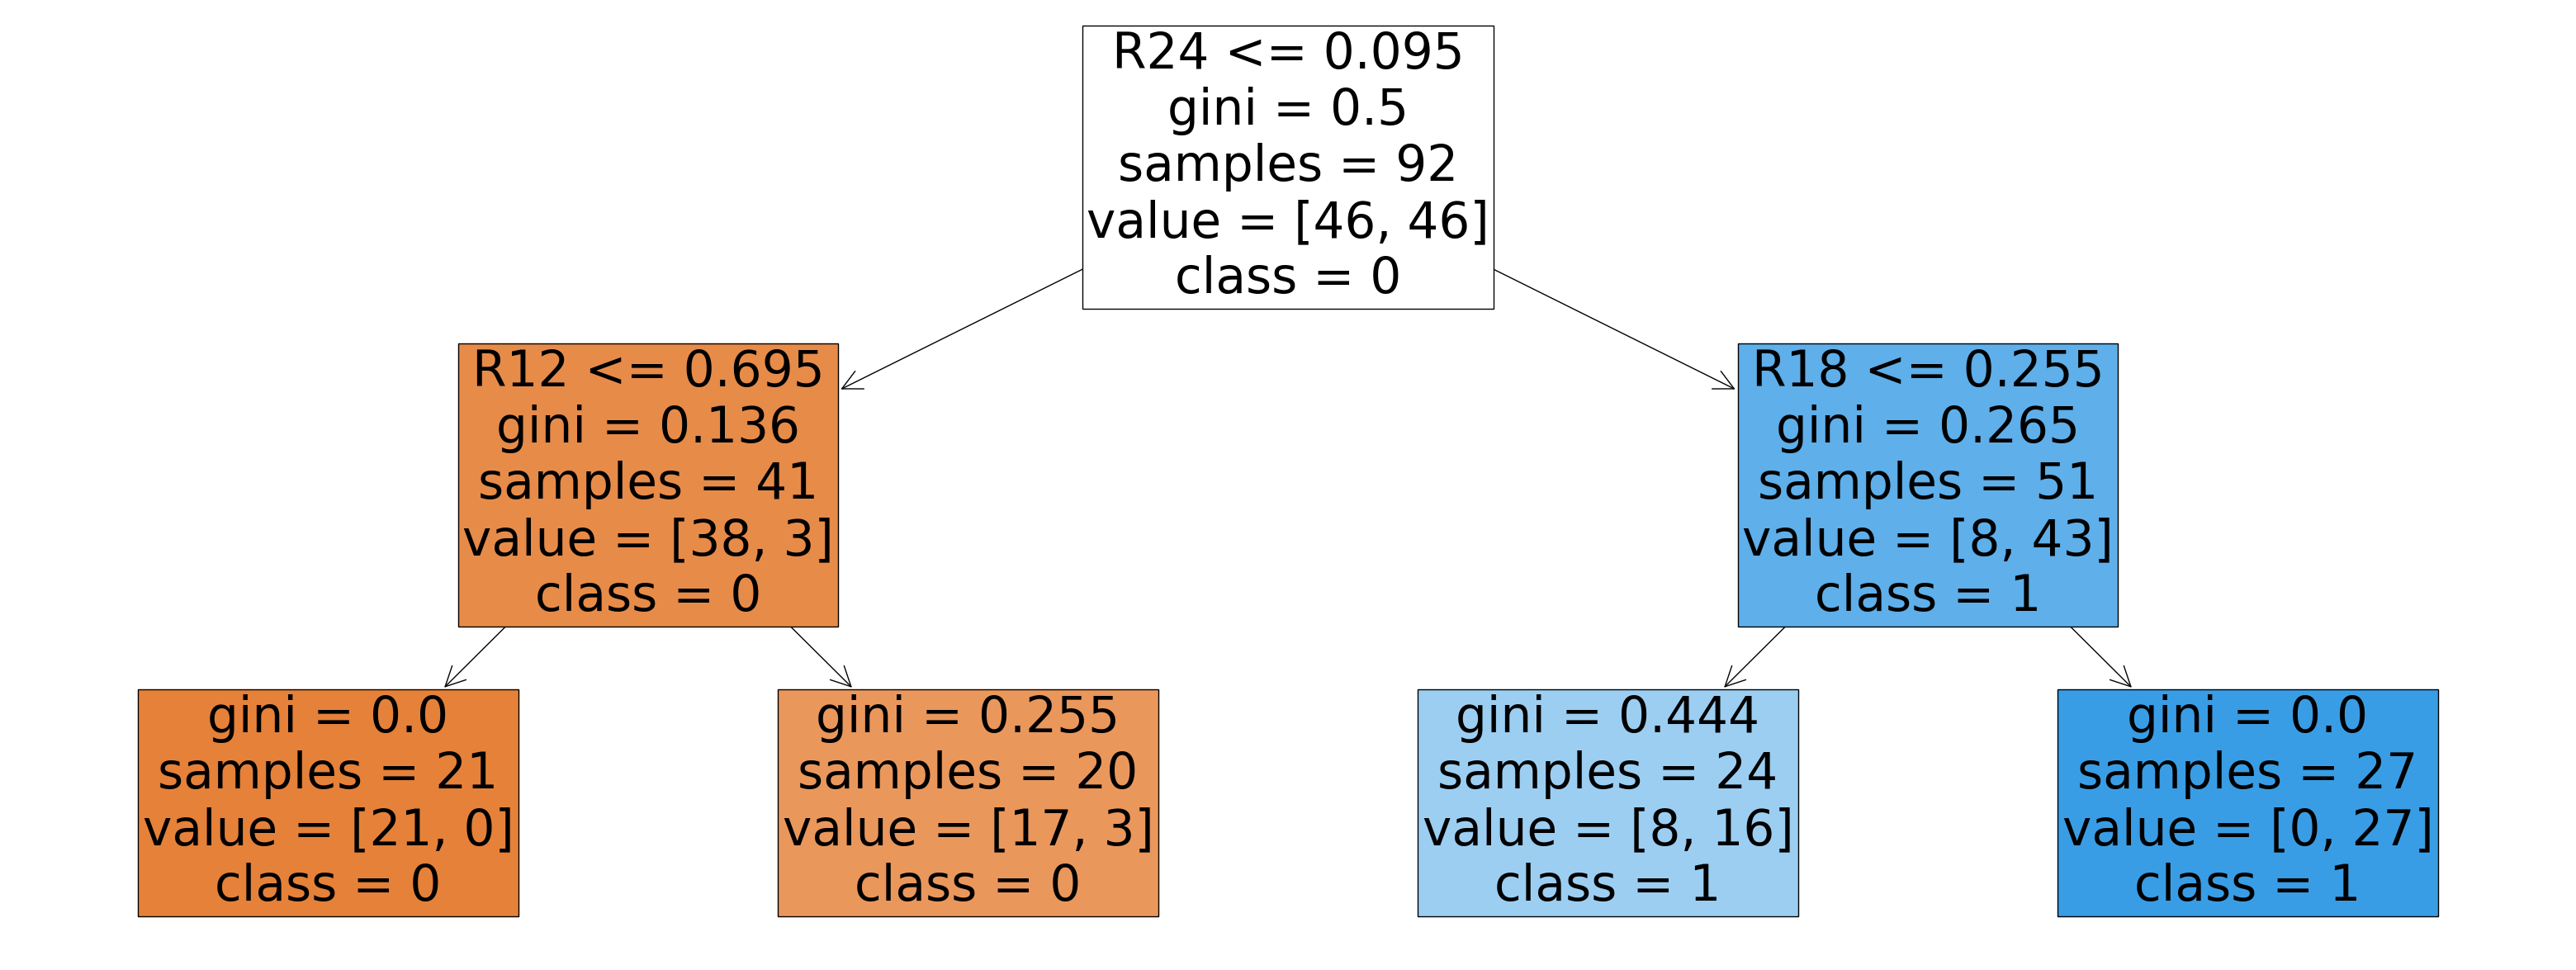

In [5]:
# Create a figure with a larger size to accommodate the tree
plt.figure(figsize=(40, 15))

# Plot the decision tree
# dtc is the trained Decision Tree Classifier model
# feature_names=x_train.columns provides the feature names for the tree
# class_names=['0', '1'] sets the class names for the tree
# filled=True fills the tree nodes with colors
# fontsize=43 sets the font size for the tree
plot_tree(dtc, feature_names=x_train.columns, class_names=['0', '1'], filled=True, fontsize=43)

# Display the plot
plt.show()

# GridSearchCV

In [6]:
# Define the hyperparameter grid for the Decision Tree Classifier
params = {
    'max_depth': [2, 5, 7, 10, 13, None],
    'min_samples_split': [2, 5, 7, 10, 13],
    'min_samples_leaf': [1, 5, 7, 0, 10, 13]
}

# Create a 5-fold cross-validation object with shuffling and a random state of 24
kfold = KFold(n_splits=5, shuffle=True, random_state=24)

# Create a Decision Tree Classifier model with a random state of 24
dtc = DecisionTreeClassifier(random_state=24)

# Create a GridSearchCV object to perform hyperparameter tuning
# dtc is the base estimator
# param_grid=params is the hyperparameter grid to search
# cv=kfold is the cross-validation object
# scoring='neg_log_loss' is the evaluation metric to use (negative log-loss)
gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, scoring='neg_log_loss')

# Fit the GridSearchCV object to the data
gcv.fit(x, y)

# Print the best hyperparameters found by the grid search
print(gcv.best_params_)

# Print the best score (negative log-loss) achieved by the grid search
print(gcv.best_score_)

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
-0.7854991784482088


# Best Tree

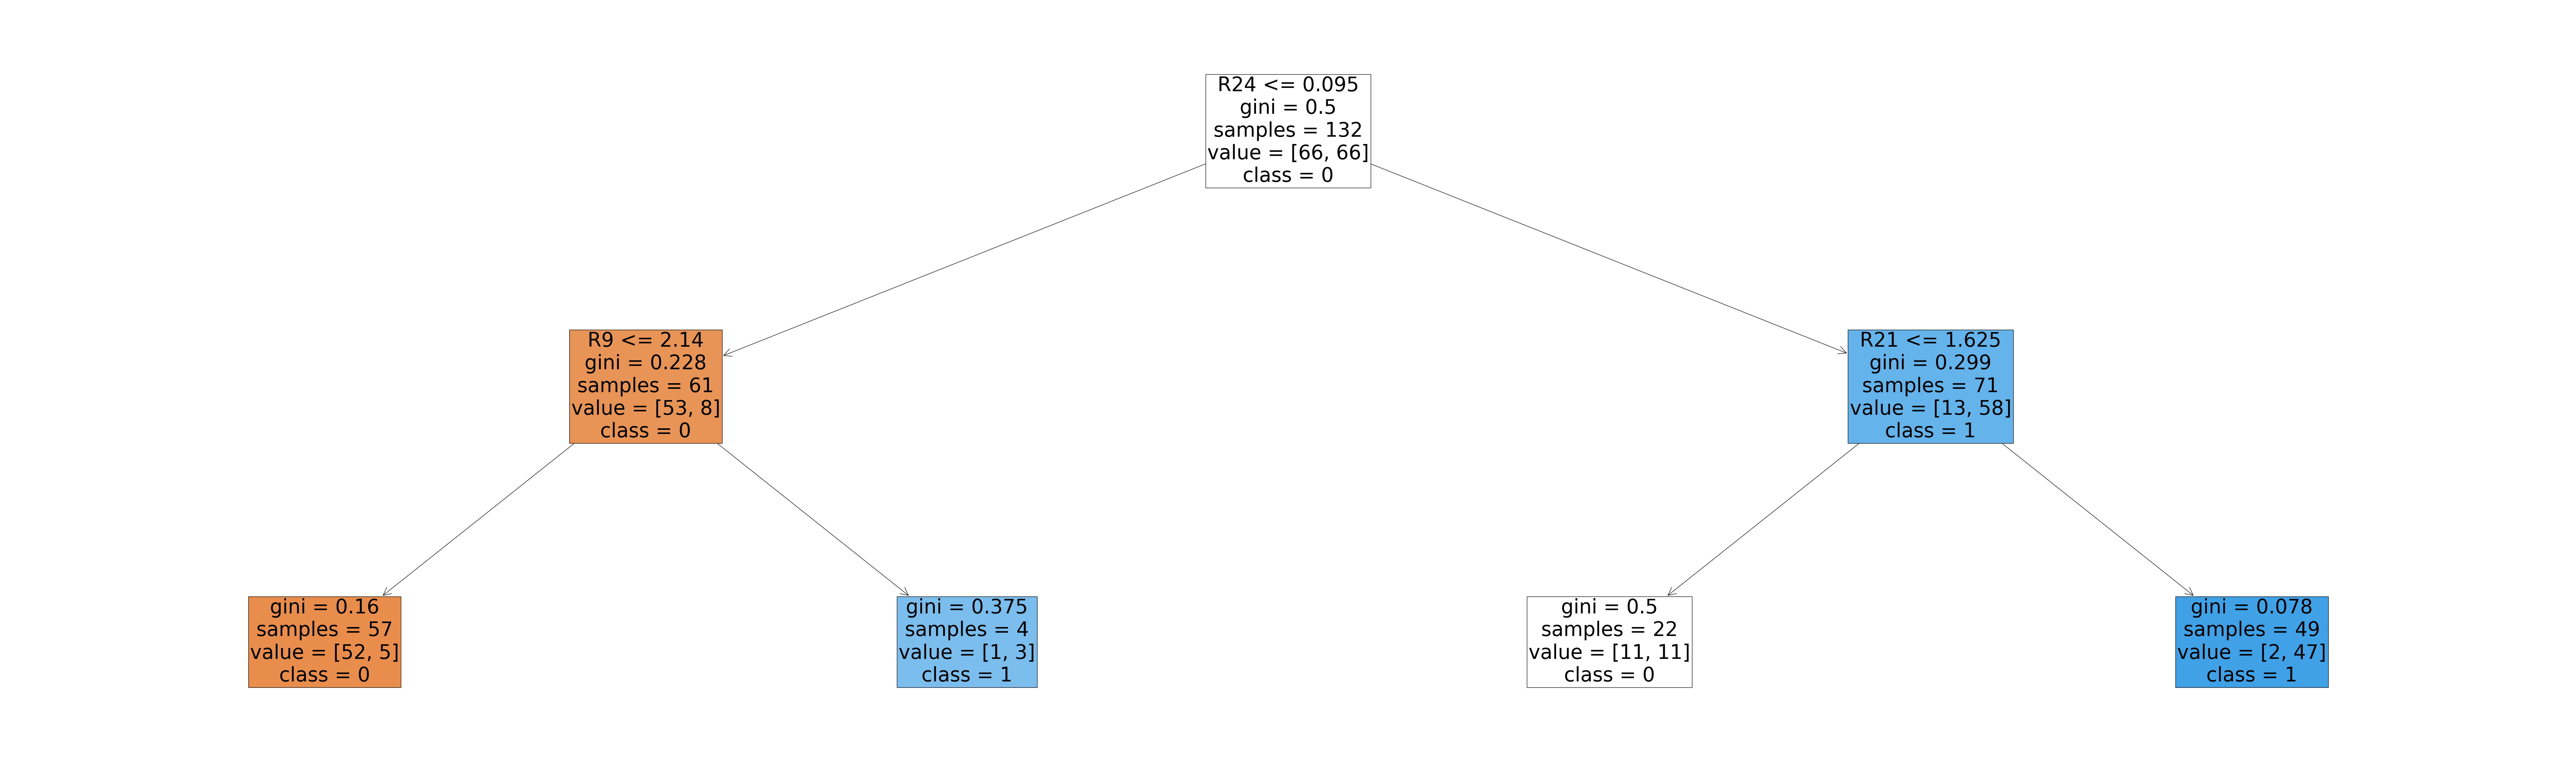

In [7]:
# Get the best estimator (Decision Tree Classifier) from the GridSearchCV object
best_tree = gcv.best_estimator_

# Create a figure with a larger size to accommodate the tree
plt.figure(figsize=(100, 30))

# Plot the best decision tree
# best_tree is the best estimator found by the GridSearchCV
# feature_names=x_train.columns provides the feature names for the tree
# class_names=['0', '1'] sets the class names for the tree
# filled=True fills the tree nodes with colors
# fontsize=43 sets the font size for the tree
plot_tree(best_tree, feature_names=x_train.columns, class_names=['0', '1'], filled=True, fontsize=43)

# Display the plot
plt.show()

# importance chart

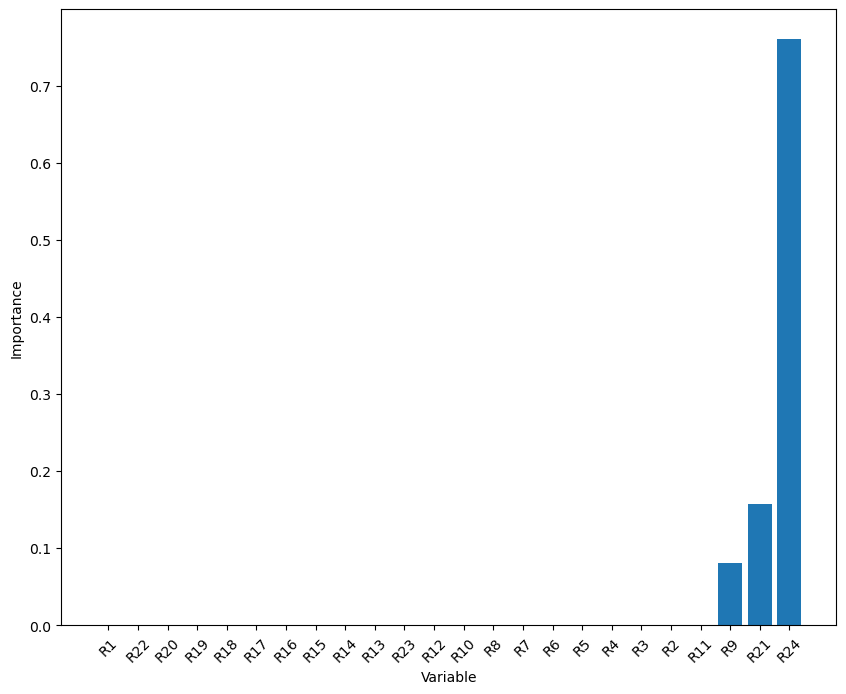

In [8]:
# Create a pandas DataFrame with the feature names and importances
pd_imp = pd.DataFrame({'var': list(x.columns), 'imp': best_tree.feature_importances_})

# Sort the DataFrame by the feature importances in ascending order
pd_imp.sort_values(by='imp', inplace=True)

# Create a vertical bar plot of the feature importances
plt.figure(figsize=(10, 8))
plt.bar(pd_imp['var'], pd_imp['imp'])

# Set the x-axis label
plt.xlabel('Variable')

# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Importance')

# Display the plot
plt.show()